In [21]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

In [22]:
# Set the working directory
os.chdir("C:\\Users\\sayas\\OneDrive\\New folder\\python projects")
print(f"Current working directory: {os.getcwd()}")

Current working directory: C:\Users\sayas\OneDrive\New folder\python projects


In [23]:
# Load the dataset
data = pd.read_csv("C:\\Users\\sayas\\OneDrive\\New folder\\python projects\\NSSO68.csv")

# Display the first few rows of the dataset to ensure it's loaded correctly
print(data.head())

C:\Users\sayas\AppData\Local\Temp\ipykernel_17324\1094305260.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\sayas\\OneDrive\\New folder\\python projects\\NSSO68.csv")


   slno                                 grp  Round_Centre  FSU_number  Round  \
0     1  40999999999999992652495293775872.0             1       41000     68   
1     2  40999999999999992652495293775872.0             1       41000     68   
2     3  40999999999999992652495293775872.0             1       41000     68   
3     4  40999999999999992652495293775872.0             1       41000     68   
4     5  40999999999999992652495293775872.0             1       41000     68   

   Schedule_Number  Sample  Sector  state  State_Region  ...  pickle_v  \
0               10       1       2     24           242  ...       0.0   
1               10       1       2     24           242  ...       0.0   
2               10       1       2     24           242  ...       0.0   
3               10       1       2     24           242  ...       0.0   
4               10       1       2     24           242  ...       0.0   

   sauce_jam_v  Othrprocessed_v  Beveragestotal_v  foodtotal_v  foodtotal_

In [24]:
# # Display unique values in the 'state_1' column
unique_states = data['state_1'].drop_duplicates().tolist()
print(f"Unique states: {unique_states}")

Unique states: ['GUJ', 'ORI', 'CHTSD', 'MP', 'JRKD', 'WB', 'AP', 'MH', 'D&D', 'D&NH', 'MIZ', 'TRPR', 'MANPR', 'ASSM', 'MEG', 'NAG', 'A&N', 'PNDCRY', 'TN', 'GOA', 'KA', 'KE', 'LKSDP', 'SKM', 'Bhr', 'UP', 'RJ', 'ARP', 'DL', 'HR', 'Pun', 'HP', 'UT', 'Chandr', 'J$K']


In [25]:
# Filter and select specific columns from the data
subset_data = data[data['state_1'] == 'WB'][['foodtotal_q', 'MPCE_MRP', 'MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education', 'No_of_Meals_per_day']]
print("Subset data:")
print(subset_data.head())

Subset data:
      foodtotal_q  MPCE_MRP  MPCE_URP  Age  Meals_At_Home  \
6218    31.463011   3088.75   3079.00   45           90.0   
6219    20.178901   1677.95   1481.00   50           60.0   
6220    14.793985    700.26    619.75   36           60.0   
6221    16.100309    700.26    657.67   58           60.0   
6222    24.567193   1070.02   1027.67   35           90.0   

      Possess_ration_card  Education  No_of_Meals_per_day  
6218                  1.0       10.0                  3.0  
6219                  1.0       10.0                  2.0  
6220                  1.0       10.0                  2.0  
6221                  1.0        1.0                  2.0  
6222                  1.0        7.0                  3.0  


In [26]:
# Check for missing values in the subset_data
print("Missing values in subset_data:")
print(subset_data.isna().sum())

Missing values in subset_data:
foodtotal_q              0
MPCE_MRP                 0
MPCE_URP                 0
Age                      0
Meals_At_Home          111
Possess_ration_card      0
Education                0
No_of_Meals_per_day      5
dtype: int64


In [27]:
# Impute missing values with mean values
imputer = SimpleImputer(strategy='mean')
subset_data['Possess_ration_card'] = imputer.fit_transform(subset_data[['Possess_ration_card']])
subset_data['MPCE_URP'] = imputer.fit_transform(subset_data[['MPCE_URP']])
subset_data['Age'] = imputer.fit_transform(subset_data[['Age']])
subset_data['Meals_At_Home'] = imputer.fit_transform(subset_data[['Meals_At_Home']])
subset_data['Education'] = imputer.fit_transform(subset_data[['Education']])


In [28]:
# Check if missing values are imputed
print("Missing values after imputation:")
print(subset_data.isna().sum())

Missing values after imputation:
foodtotal_q            0
MPCE_MRP               0
MPCE_URP               0
Age                    0
Meals_At_Home          0
Possess_ration_card    0
Education              0
No_of_Meals_per_day    5
dtype: int64


In [29]:
# Check for infinite values
print("Check for infinite values in subset_data:")
print(np.isinf(subset_data).sum())

Check for infinite values in subset_data:
foodtotal_q            0
MPCE_MRP               0
MPCE_URP               0
Age                    0
Meals_At_Home          0
Possess_ration_card    0
Education              0
No_of_Meals_per_day    0
dtype: int64


In [30]:
# Drop rows with any remaining missing or infinite values
subset_data = subset_data.replace([np.inf, -np.inf], np.nan).dropna()

In [31]:
# Fit the regression model
X = subset_data[['MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = subset_data['foodtotal_q']

In [32]:
# Fit the model
model = sm.OLS(y, X).fit()

In [33]:
# Print the regression results
print("Regression results:")
print(model.summary())

Regression results:
                            OLS Regression Results                            
Dep. Variable:            foodtotal_q   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.20e-225
Time:                        20:10:40   Log-Likelihood:                -21838.
No. Observations:                6310   AIC:                         4.369e+04
Df Residuals:                    6304   BIC:                         4.373e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

In [34]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF data:")
print(vif_data)

VIF data:
               feature        VIF
0                const  60.414198
1             MPCE_URP   1.286953
2                  Age   1.030163
3        Meals_At_Home   1.057454
4  Possess_ration_card   1.033477
5            Education   1.239538


In [35]:
# Extract the coefficients from the model
coefficients = model.params

In [36]:
# Construct the equation
equation = f"y = {coefficients[0]:.2f}"
for i in range(1, len(coefficients)):
    equation += f" + {coefficients[i]:.6f}*x{i}"
print("Regression equation:")
print(equation)

Regression equation:
y = 13.20 + 0.001171*x1 + 0.080444*x2 + 0.090922*x3 + -2.241875*x4 + 0.217936*x5


C:\Users\sayas\AppData\Local\Temp\ipykernel_17324\2268581182.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"y = {coefficients[0]:.2f}"
C:\Users\sayas\AppData\Local\Temp\ipykernel_17324\2268581182.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation += f" + {coefficients[i]:.6f}*x{i}"


In [37]:
# Display head of specific columns for verification
print("Verification data:")
print(subset_data[['MPCE_MRP', 'MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education', 'foodtotal_q']].head(1))

Verification data:
      MPCE_MRP  MPCE_URP   Age  Meals_At_Home  Possess_ration_card  Education  \
6218   3088.75    3079.0  45.0           90.0                  1.0       10.0   

      foodtotal_q  
6218    31.463011  


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

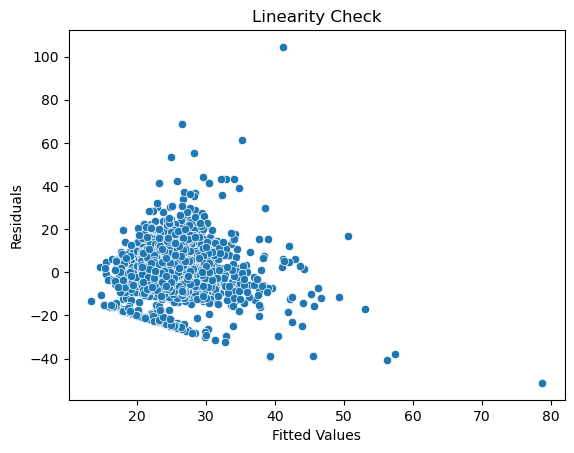

In [42]:
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

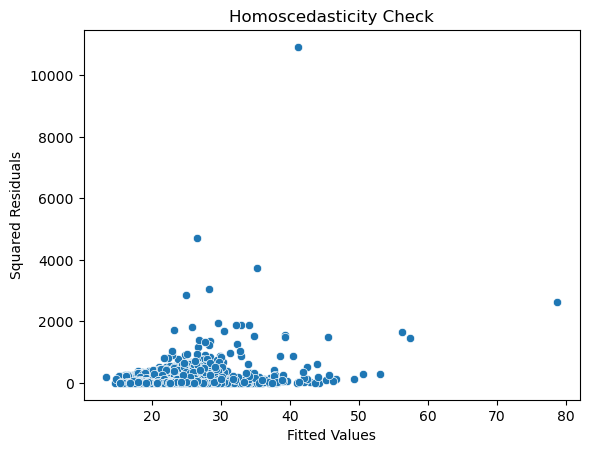

In [43]:
sns.scatterplot(x=model.fittedvalues, y=model.resid**2)
plt.xlabel('Fitted Values')
plt.ylabel('Squared Residuals')
plt.title('Homoscedasticity Check')
plt.show()

C:\Users\sayas\AppData\Local\Temp\ipykernel_17324\1671985890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid, kde=False)


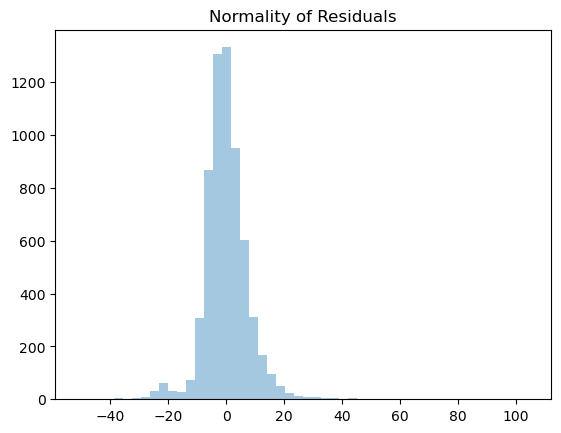

In [44]:
sns.distplot(model.resid, kde=False)
plt.title('Normality of Residuals')
plt.show()

In [45]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.5327841886513172
